2026-01-18 17:05:46.709594: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1768752346.730732   18182 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1768752346.739554   18182 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1768752346.754285   18182 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768752346.754431   18182 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768752346.754438   18182 computation_placer.cc:177] computation placer alr

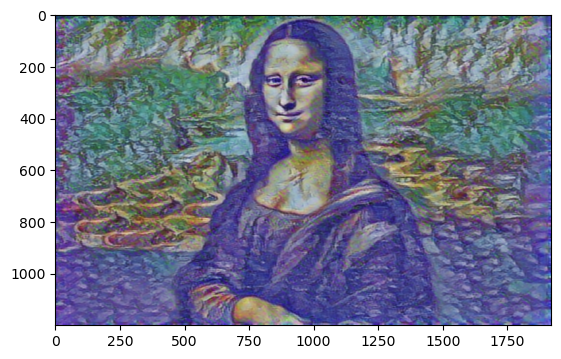

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os

CWD = os.getcwd()

with tf.device("/CPU:0"):
  def loader(path):
    im = tf.image.decode_image(tf.io.read_file(path),
                              channels=3,
                              dtype=tf.float32)
    original_shape = im.shape[:2]
    im = tf.image.resize(im, (512, 512))
    return (tf.expand_dims(im, axis=0), original_shape)

  loaded_model = tf.saved_model.load(f"{CWD}/model")
  content, original_shape = loader(f"{CWD}/sample_images/mona_lisa.jpg")
  style, _ = loader(f"{CWD}/sample_images/VanGogh-StarryNight3.jpg")
  output = loaded_model(content, style)
  output = tf.image.resize(tf.squeeze(output[0], axis=0), original_shape)
  plt.imshow(output.numpy())

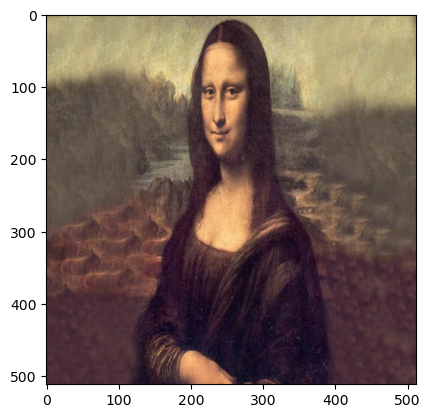

In [4]:
plt.imshow(tf.squeeze(content, axis=0).numpy())

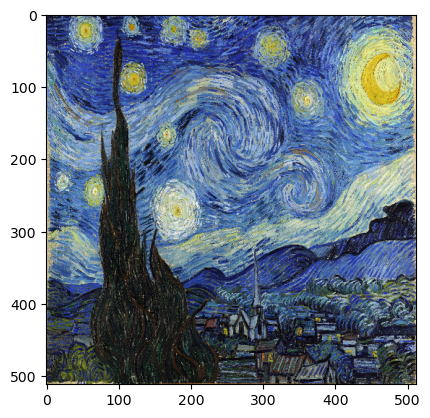

In [5]:
plt.imshow(tf.squeeze(style, axis=0).numpy())

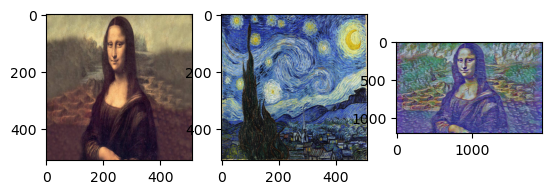

In [7]:
content = tf.squeeze(content, axis=0)
style = tf.squeeze(style,  axis=0)
for i, t in enumerate([content, style, output]):
    plt.subplot(1,3,i+1)
    plt.imshow(t.numpy())
plt.show()